In [2]:
library(limma)
library(Biobase)
library(dplyr)
library(ggplot2)
library(magrittr)
library(ggrepel)

Expression Set object

In [1313]:
data <- read.csv("exp/final_METABRIC_tnbc.csv", header=TRUE)

#data <- read.csv("exp/final_METABRIC_luma.csv", header=TRUE)

In [1314]:

### TNBC and LumA same preprocessing
data <- data[,c(-2,-1)]
data = t(data)





In [1315]:
# data

In [1316]:
### tnbc good --------- finalized


data_subset_1 = as.matrix(data[,c(7, 11, 18, 33, 34, 51, 53, 61, 69, 73, 74, 79, 83, 85, 88, 95, 98, 99, 108, 112, 113, 115, 125, 126, 127, 130, 133, 137, 143, 145, 150, 160, 170, 173, 178, 181, 182, 186, 191, 195, 197, 198, 212, 214, 218, 219, 220, 223, 230, 235, 245, 246, 247, 257, 260, 265, 270, 277, 279, 283, 284, 289, 296, 297)])
data_subset_2 = as.matrix(data[,c(1, 2, 3, 4, 5, 6, 8, 9, 10, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 52, 54, 55, 56, 57, 58, 59, 60, 62, 63, 64, 65, 66, 67, 68, 70, 71, 72, 75, 76, 77, 78, 80, 81, 82, 84, 86, 87, 89, 90, 91, 92, 93, 94, 96, 97, 100, 101, 102, 103, 104, 105, 106, 107, 109, 110, 111, 114, 116, 117, 118, 119, 120, 121, 122, 123, 124, 128, 129, 131, 132, 134, 135, 136, 138, 139, 140, 141, 142, 144, 146, 147, 148, 149, 151, 152, 153, 154, 155, 156, 157, 158, 159, 161, 162, 163, 164, 165, 166, 167, 168, 169, 171, 172, 174, 175, 176, 177, 179, 180, 183, 184, 185, 187, 188, 189, 190, 192, 193, 194, 196, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 213, 215, 216, 217, 221, 222, 224, 225, 226, 227, 228, 229, 231, 232, 233, 234, 236, 237, 238, 239, 240, 241, 242, 243, 244, 248, 249, 250, 251, 252, 253, 254, 255, 256, 258, 259, 261, 262, 263, 264, 266, 267, 268, 269, 271, 272, 273, 274, 275, 276, 278, 280, 281, 282, 285, 286, 287, 288, 290, 291, 292, 293, 294, 295, 298, 299)])
##

In [1317]:
#####lumA bad ---------- finalized


# data_subset_1 = as.matrix(data[,c(28, 74, 76, 87, 95, 99, 111, 124, 131, 142, 156, 165, 173, 188, 195, 201, 207, 220, 222, 244, 268, 273, 274, 283, 300, 324, 356, 376, 387, 388, 389, 398, 427, 430, 437, 444, 445, 448, 462, 469, 484, 508, 527, 529, 538, 560, 569, 579, 589, 593, 626, 627, 653, 655, 663, 667, 672, 675, 687, 708, 713, 723, 725, 730, 740, 746, 747, 759, 771, 777, 793, 830, 865, 890, 912, 921, 922, 926, 927, 929, 962, 971, 981, 985, 1001, 1027, 1028, 1032, 1038, 1045, 1082, 1131, 1134, 1144, 1154, 1159, 1177, 1183, 1192, 1210, 1236, 1259, 1263, 1268, 1298, 1310, 1345, 1350, 1363, 1366)])
# data_subset_2 = as.matrix(data[,c(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 75, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 88, 89, 90, 91, 92, 93, 94, 96, 97, 98, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 125, 126, 127, 128, 129, 130, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 157, 158, 159, 160, 161, 162, 163, 164, 166, 167, 168, 169, 170, 171, 172, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 189, 190, 191, 192, 193, 194, 196, 197, 198, 199, 200, 202, 203, 204, 205, 206, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 221, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 269, 270, 271, 272, 275, 276, 277, 278, 279, 280, 281, 282, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 390, 391, 392, 393, 394, 395, 396, 397, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 428, 429, 431, 432, 433, 434, 435, 436, 438, 439, 440, 441, 442, 443, 446, 447, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 463, 464, 465, 466, 467, 468, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 483, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499, 500, 501, 502, 503, 504, 505, 506, 507, 509, 510, 511, 512, 513, 514, 515, 516, 517, 518, 519, 520, 521, 522, 523, 524, 525, 526, 528, 530, 531, 532, 533, 534, 535, 536, 537, 539, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551, 552, 553, 554, 555, 556, 557, 558, 559, 561, 562, 563, 564, 565, 566, 567, 568, 570, 571, 572, 573, 574, 575, 576, 577, 578, 580, 581, 582, 583, 584, 585, 586, 587, 588, 590, 591, 592, 594, 595, 596, 597, 598, 599, 600, 601, 602, 603, 604, 605, 606, 607, 608, 609, 610, 611, 612, 613, 614, 615, 616, 617, 618, 619, 620, 621, 622, 623, 624, 625, 628, 629, 630, 631, 632, 633, 634, 635, 636, 637, 638, 639, 640, 641, 642, 643, 644, 645, 646, 647, 648, 649, 650, 651, 652, 654, 656, 657, 658, 659, 660, 661, 662, 664, 665, 666, 668, 669, 670, 671, 673, 674, 676, 677, 678, 679, 680, 681, 682, 683, 684, 685, 686, 688, 689, 690, 691, 692, 693, 694, 695, 696, 697, 698, 699, 700, 701, 702, 703, 704, 705, 706, 707, 709, 710, 711, 712, 714, 715, 716, 717, 718, 719, 720, 721, 722, 724, 726, 727, 728, 729, 731, 732, 733, 734, 735, 736, 737, 738, 739, 741, 742, 743, 744, 745, 748, 749, 750, 751, 752, 753, 754, 755, 756, 757, 758, 760, 761, 762, 763, 764, 765, 766, 767, 768, 769, 770, 772, 773, 774, 775, 776, 778, 779, 780, 781, 782, 783, 784, 785, 786, 787, 788, 789, 790, 791, 792, 794, 795, 796, 797, 798, 799, 800, 801, 802, 803, 804, 805, 806, 807, 808, 809, 810, 811, 812, 813, 814, 815, 816, 817, 818, 819, 820, 821, 822, 823, 824, 825, 826, 827, 828, 829, 831, 832, 833, 834, 835, 836, 837, 838, 839, 840, 841, 842, 843, 844, 845, 846, 847, 848, 849, 850, 851, 852, 853, 854, 855, 856, 857, 858, 859, 860, 861, 862, 863, 864, 866, 867, 868, 869, 870, 871, 872, 873, 874, 875, 876, 877, 878, 879, 880, 881, 882, 883, 884, 885, 886, 887, 888, 889, 891, 892, 893, 894, 895, 896, 897, 898, 899, 900, 901, 902, 903, 904, 905, 906, 907, 908, 909, 910, 911, 913, 914, 915, 916, 917, 918, 919, 920, 923, 924, 925, 928, 930, 931, 932, 933, 934, 935, 936, 937, 938, 939, 940, 941, 942, 943, 944, 945, 946, 947, 948, 949, 950, 951, 952, 953, 954, 955, 956, 957, 958, 959, 960, 961, 963, 964, 965, 966, 967, 968, 969, 970, 972, 973, 974, 975, 976, 977, 978, 979, 980, 982, 983, 984, 986, 987, 988, 989, 990, 991, 992, 993, 994, 995, 996, 997, 998, 999, 1000, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010, 1011, 1012, 1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021, 1022, 1023, 1024, 1025, 1026, 1029, 1030, 1031, 1033, 1034, 1035, 1036, 1037, 1039, 1040, 1041, 1042, 1043, 1044, 1046, 1047, 1048, 1049, 1050, 1051, 1052, 1053, 1054, 1055, 1056, 1057, 1058, 1059, 1060, 1061, 1062, 1063, 1064, 1065, 1066, 1067, 1068, 1069, 1070, 1071, 1072, 1073, 1074, 1075, 1076, 1077, 1078, 1079, 1080, 1081, 1083, 1084, 1085, 1086, 1087, 1088, 1089, 1090, 1091, 1092, 1093, 1094, 1095, 1096, 1097, 1098, 1099, 1100, 1101, 1102, 1103, 1104, 1105, 1106, 1107, 1108, 1109, 1110, 1111, 1112, 1113, 1114, 1115, 1116, 1117, 1118, 1119, 1120, 1121, 1122, 1123, 1124, 1125, 1126, 1127, 1128, 1129, 1130, 1132, 1133, 1135, 1136, 1137, 1138, 1139, 1140, 1141, 1142, 1143, 1145, 1146, 1147, 1148, 1149, 1150, 1151, 1152, 1153, 1155, 1156, 1157, 1158, 1160, 1161, 1162, 1163, 1164, 1165, 1166, 1167, 1168, 1169, 1170, 1171, 1172, 1173, 1174, 1175, 1176, 1178, 1179, 1180, 1181, 1182, 1184, 1185, 1186, 1187, 1188, 1189, 1190, 1191, 1193, 1194, 1195, 1196, 1197, 1198, 1199, 1200, 1201, 1202, 1203, 1204, 1205, 1206, 1207, 1208, 1209, 1211, 1212, 1213, 1214, 1215, 1216, 1217, 1218, 1219, 1220, 1221, 1222, 1223, 1224, 1225, 1226, 1227, 1228, 1229, 1230, 1231, 1232, 1233, 1234, 1235, 1237, 1238, 1239, 1240, 1241, 1242, 1243, 1244, 1245, 1246, 1247, 1248, 1249, 1250, 1251, 1252, 1253, 1254, 1255, 1256, 1257, 1258, 1260, 1261, 1262, 1264, 1265, 1266, 1267, 1269, 1270, 1271, 1272, 1273, 1274, 1275, 1276, 1277, 1278, 1279, 1280, 1281, 1282, 1283, 1284, 1285, 1286, 1287, 1288, 1289, 1290, 1291, 1292, 1293, 1294, 1295, 1296, 1297, 1299, 1300, 1301, 1302, 1303, 1304, 1305, 1306, 1307, 1308, 1309, 1311, 1312, 1313, 1314, 1315, 1316, 1317, 1318, 1319, 1320, 1321, 1322, 1323, 1324, 1325, 1326, 1327, 1328, 1329, 1330, 1331, 1332, 1333, 1334, 1335, 1336, 1337, 1338, 1339, 1340, 1341, 1342, 1343, 1344, 1346, 1347, 1348, 1349, 1351, 1352, 1353, 1354, 1355, 1356, 1357, 1358, 1359, 1360, 1361, 1362, 1364, 1365, 1367, 1368, 1369)])

# #

In [1318]:
# ### clus7 - matched --- ----- finalized


# data_subset_1 = as.matrix(data[,c(21, 31, 72, 117, 162, 176, 210, 223, 259, 263, 279, 314, 339, 341, 354, 364, 372, 391, 397, 419, 427, 469, 475, 478, 479, 499, 509, 519, 531, 559, 618, 675, 690, 692, 698, 713, 729, 730, 800, 827, 854, 860, 882, 902, 934, 941, 1034, 1057, 1165, 1169, 1178, 1184, 1192, 1279, 1301, 1306, 1322, 1359, 1389, 1433, 1466, 1500, 1541, 1570, 1622, 1623, 1629, 1662, 1690, 1714, 1742, 1744, 1748, 1751, 1804, 1813, 1871)])
# data_subset_2 = as.matrix(data[,c(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 260, 261, 262, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 340, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 355, 356, 357, 358, 359, 360, 361, 362, 363, 365, 366, 367, 368, 369, 370, 371, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 392, 393, 394, 395, 396, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 420, 421, 422, 423, 424, 425, 426, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 470, 471, 472, 473, 474, 476, 477, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494, 495, 496, 497, 498, 500, 501, 502, 503, 504, 505, 506, 507, 508, 510, 511, 512, 513, 514, 515, 516, 517, 518, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551, 552, 553, 554, 555, 556, 557, 558, 560, 561, 562, 563, 564, 565, 566, 567, 568, 569, 570, 571, 572, 573, 574, 575, 576, 577, 578, 579, 580, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597, 598, 599, 600, 601, 602, 603, 604, 605, 606, 607, 608, 609, 610, 611, 612, 613, 614, 615, 616, 617, 619, 620, 621, 622, 623, 624, 625, 626, 627, 628, 629, 630, 631, 632, 633, 634, 635, 636, 637, 638, 639, 640, 641, 642, 643, 644, 645, 646, 647, 648, 649, 650, 651, 652, 653, 654, 655, 656, 657, 658, 659, 660, 661, 662, 663, 664, 665, 666, 667, 668, 669, 670, 671, 672, 673, 674, 676, 677, 678, 679, 680, 681, 682, 683, 684, 685, 686, 687, 688, 689, 691, 693, 694, 695, 696, 697, 699, 700, 701, 702, 703, 704, 705, 706, 707, 708, 709, 710, 711, 712, 714, 715, 716, 717, 718, 719, 720, 721, 722, 723, 724, 725, 726, 727, 728, 731, 732, 733, 734, 735, 736, 737, 738, 739, 740, 741, 742, 743, 744, 745, 746, 747, 748, 749, 750, 751, 752, 753, 754, 755, 756, 757, 758, 759, 760, 761, 762, 763, 764, 765, 766, 767, 768, 769, 770, 771, 772, 773, 774, 775, 776, 777, 778, 779, 780, 781, 782, 783, 784, 785, 786, 787, 788, 789, 790, 791, 792, 793, 794, 795, 796, 797, 798, 799, 801, 802, 803, 804, 805, 806, 807, 808, 809, 810, 811, 812, 813, 814, 815, 816, 817, 818, 819, 820, 821, 822, 823, 824, 825, 826, 828, 829, 830, 831, 832, 833, 834, 835, 836, 837, 838, 839, 840, 841, 842, 843, 844, 845, 846, 847, 848, 849, 850, 851, 852, 853, 855, 856, 857, 858, 859, 861, 862, 863, 864, 865, 866, 867, 868, 869, 870, 871, 872, 873, 874, 875, 876, 877, 878, 879, 880, 881, 883, 884, 885, 886, 887, 888, 889, 890, 891, 892, 893, 894, 895, 896, 897, 898, 899, 900, 901, 903, 904, 905, 906, 907, 908, 909, 910, 911, 912, 913, 914, 915, 916, 917, 918, 919, 920, 921, 922, 923, 924, 925, 926, 927, 928, 929, 930, 931, 932, 933, 935, 936, 937, 938, 939, 940, 942, 943, 944, 945, 946, 947, 948, 949, 950, 951, 952, 953, 954, 955, 956, 957, 958, 959, 960, 961, 962, 963, 964, 965, 966, 967, 968, 969, 970, 971, 972, 973, 974, 975, 976, 977, 978, 979, 980, 981, 982, 983, 984, 985, 986, 987, 988, 989, 990, 991, 992, 993, 994, 995, 996, 997, 998, 999, 1000, 1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010, 1011, 1012, 1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021, 1022, 1023, 1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032, 1033, 1035, 1036, 1037, 1038, 1039, 1040, 1041, 1042, 1043, 1044, 1045, 1046, 1047, 1048, 1049, 1050, 1051, 1052, 1053, 1054, 1055, 1056, 1058, 1059, 1060, 1061, 1062, 1063, 1064, 1065, 1066, 1067, 1068, 1069, 1070, 1071, 1072, 1073, 1074, 1075, 1076, 1077, 1078, 1079, 1080, 1081, 1082, 1083, 1084, 1085, 1086, 1087, 1088, 1089, 1090, 1091, 1092, 1093, 1094, 1095, 1096, 1097, 1098, 1099, 1100, 1101, 1102, 1103, 1104, 1105, 1106, 1107, 1108, 1109, 1110, 1111, 1112, 1113, 1114, 1115, 1116, 1117, 1118, 1119, 1120, 1121, 1122, 1123, 1124, 1125, 1126, 1127, 1128, 1129, 1130, 1131, 1132, 1133, 1134, 1135, 1136, 1137, 1138, 1139, 1140, 1141, 1142, 1143, 1144, 1145, 1146, 1147, 1148, 1149, 1150, 1151, 1152, 1153, 1154, 1155, 1156, 1157, 1158, 1159, 1160, 1161, 1162, 1163, 1164, 1166, 1167, 1168, 1170, 1171, 1172, 1173, 1174, 1175, 1176, 1177, 1179, 1180, 1181, 1182, 1183, 1185, 1186, 1187, 1188, 1189, 1190, 1191, 1193, 1194, 1195, 1196, 1197, 1198, 1199, 1200, 1201, 1202, 1203, 1204, 1205, 1206, 1207, 1208, 1209, 1210, 1211, 1212, 1213, 1214, 1215, 1216, 1217, 1218, 1219, 1220, 1221, 1222, 1223, 1224, 1225, 1226, 1227, 1228, 1229, 1230, 1231, 1232, 1233, 1234, 1235, 1236, 1237, 1238, 1239, 1240, 1241, 1242, 1243, 1244, 1245, 1246, 1247, 1248, 1249, 1250, 1251, 1252, 1253, 1254, 1255, 1256, 1257, 1258, 1259, 1260, 1261, 1262, 1263, 1264, 1265, 1266, 1267, 1268, 1269, 1270, 1271, 1272, 1273, 1274, 1275, 1276, 1277, 1278, 1280, 1281, 1282, 1283, 1284, 1285, 1286, 1287, 1288, 1289, 1290, 1291, 1292, 1293, 1294, 1295, 1296, 1297, 1298, 1299, 1300, 1302, 1303, 1304, 1305, 1307, 1308, 1309, 1310, 1311, 1312, 1313, 1314, 1315, 1316, 1317, 1318, 1319, 1320, 1321, 1323, 1324, 1325, 1326, 1327, 1328, 1329, 1330, 1331, 1332, 1333, 1334, 1335, 1336, 1337, 1338, 1339, 1340, 1341, 1342, 1343, 1344, 1345, 1346, 1347, 1348, 1349, 1350, 1351, 1352, 1353, 1354, 1355, 1356, 1357, 1358, 1360, 1361, 1362, 1363, 1364, 1365, 1366, 1367, 1368, 1369, 1370, 1371, 1372, 1373, 1374, 1375, 1376, 1377, 1378, 1379, 1380, 1381, 1382, 1383, 1384, 1385, 1386, 1387, 1388, 1390, 1391, 1392, 1393, 1394, 1395, 1396, 1397, 1398, 1399, 1400, 1401, 1402, 1403, 1404, 1405, 1406, 1407, 1408, 1409, 1410, 1411, 1412, 1413, 1414, 1415, 1416, 1417, 1418, 1419, 1420, 1421, 1422, 1423, 1424, 1425, 1426, 1427, 1428, 1429, 1430, 1431, 1432, 1434, 1435, 1436, 1437, 1438, 1439, 1440, 1441, 1442, 1443, 1444, 1445, 1446, 1447, 1448, 1449, 1450, 1451, 1452, 1453, 1454, 1455, 1456, 1457, 1458, 1459, 1460, 1461, 1462, 1463, 1464, 1465, 1467, 1468, 1469, 1470, 1471, 1472, 1473, 1474, 1475, 1476, 1477, 1478, 1479, 1480, 1481, 1482, 1483, 1484, 1485, 1486, 1487, 1488, 1489, 1490, 1491, 1492, 1493, 1494, 1495, 1496, 1497, 1498, 1499, 1501, 1502, 1503, 1504, 1505, 1506, 1507, 1508, 1509, 1510, 1511, 1512, 1513, 1514, 1515, 1516, 1517, 1518, 1519, 1520, 1521, 1522, 1523, 1524, 1525, 1526, 1527, 1528, 1529, 1530, 1531, 1532, 1533, 1534, 1535, 1536, 1537, 1538, 1539, 1540, 1542, 1543, 1544, 1545, 1546, 1547, 1548, 1549, 1550, 1551, 1552, 1553, 1554, 1555, 1556, 1557, 1558, 1559, 1560, 1561, 1562, 1563, 1564, 1565, 1566, 1567, 1568, 1569, 1571, 1572, 1573, 1574, 1575, 1576, 1577, 1578, 1579, 1580, 1581, 1582, 1583, 1584, 1585, 1586, 1587, 1588, 1589, 1590, 1591, 1592, 1593, 1594, 1595, 1596, 1597, 1598, 1599, 1600, 1601, 1602, 1603, 1604, 1605, 1606, 1607, 1608, 1609, 1610, 1611, 1612, 1613, 1614, 1615, 1616, 1617, 1618, 1619, 1620, 1621, 1624, 1625, 1626, 1627, 1628, 1630, 1631, 1632, 1633, 1634, 1635, 1636, 1637, 1638, 1639, 1640, 1641, 1642, 1643, 1644, 1645, 1646, 1647, 1648, 1649, 1650, 1651, 1652, 1653, 1654, 1655, 1656, 1657, 1658, 1659, 1660, 1661, 1663, 1664, 1665, 1666, 1667, 1668, 1669, 1670, 1671, 1672, 1673, 1674, 1675, 1676, 1677, 1678, 1679, 1680, 1681, 1682, 1683, 1684, 1685, 1686, 1687, 1688, 1689, 1691, 1692, 1693, 1694, 1695, 1696, 1697, 1698, 1699, 1700, 1701, 1702, 1703, 1704, 1705, 1706, 1707, 1708, 1709, 1710, 1711, 1712, 1713, 1715, 1716, 1717, 1718, 1719, 1720, 1721, 1722, 1723, 1724, 1725, 1726, 1727, 1728, 1729, 1730, 1731, 1732, 1733, 1734, 1735, 1736, 1737, 1738, 1739, 1740, 1741, 1743, 1745, 1746, 1747, 1749, 1750, 1752, 1753, 1754, 1755, 1756, 1757, 1758, 1759, 1760, 1761, 1762, 1763, 1764, 1765, 1766, 1767, 1768, 1769, 1770, 1771, 1772, 1773, 1774, 1775, 1776, 1777, 1778, 1779, 1780, 1781, 1782, 1783, 1784, 1785, 1786, 1787, 1788, 1789, 1790, 1791, 1792, 1793, 1794, 1795, 1796, 1797, 1798, 1799, 1800, 1801, 1802, 1803, 1805, 1806, 1807, 1808, 1809, 1810, 1811, 1812, 1814, 1815, 1816, 1817, 1818, 1819, 1820, 1821, 1822, 1823, 1824, 1825, 1826, 1827, 1828, 1829, 1830, 1831, 1832, 1833, 1834, 1835, 1836, 1837, 1838, 1839, 1840, 1841, 1842, 1843, 1844, 1845, 1846, 1847, 1848, 1849, 1850, 1851, 1852, 1853, 1854, 1855, 1856, 1857, 1858, 1859, 1860, 1861, 1862, 1863, 1864, 1865, 1866, 1867, 1868, 1869, 1870, 1872, 1873, 1874, 1875, 1876, 1877, 1878, 1879, 1880, 1881, 1882, 1883, 1884, 1885, 1886, 1887, 1888, 1889, 1890, 1891, 1892, 1893, 1894, 1895, 1896, 1897, 1898, 1899, 1900, 1901, 1902, 1903, 1904)])

In [1319]:
## clus6 poora  matched --- ----- finalized


# data_subset_1 = as.matrix(data[,c(21, 31, 72, 73, 101, 117, 153, 162, 176, 210, 223, 259, 263, 279, 314, 339, 341, 354, 364, 372, 391, 397, 419, 427, 469, 475, 478, 479, 499, 509, 519, 531, 559, 618, 675, 690, 692, 698, 713, 729, 730, 800, 827, 854, 860, 882, 902, 924, 934, 941, 971, 1034, 1057, 1165, 1169, 1178, 1184, 1192, 1279, 1301, 1306, 1322, 1359, 1389, 1420, 1433, 1466, 1500, 1541, 1570, 1622, 1623, 1629, 1662, 1690, 1714, 1742, 1744, 1748, 1751, 1804, 1813, 1871)])
# data_subset_2 = as.matrix(data[,c(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 260, 261, 262, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 340, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 355, 356, 357, 358, 359, 360, 361, 362, 363, 365, 366, 367, 368, 369, 370, 371, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 392, 393, 394, 395, 396, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 420, 421, 422, 423, 424, 425, 426, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 470, 471, 472, 473, 474, 476, 477, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494, 495, 496, 497, 498, 500, 501, 502, 503, 504, 505, 506, 507, 508, 510, 511, 512, 513, 514, 515, 516, 517, 518, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551, 552, 553, 554, 555, 556, 557, 558, 560, 561, 562, 563, 564, 565, 566, 567, 568, 569, 570, 571, 572, 573, 574, 575, 576, 577, 578, 579, 580, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597, 598, 599, 600, 601, 602, 603, 604, 605, 606, 607, 608, 609, 610, 611, 612, 613, 614, 615, 616, 617, 619, 620, 621, 622, 623, 624, 625, 626, 627, 628, 629, 630, 631, 632, 633, 634, 635, 636, 637, 638, 639, 640, 641, 642, 643, 644, 645, 646, 647, 648, 649, 650, 651, 652, 653, 654, 655, 656, 657, 658, 659, 660, 661, 662, 663, 664, 665, 666, 667, 668, 669, 670, 671, 672, 673, 674, 676, 677, 678, 679, 680, 681, 682, 683, 684, 685, 686, 687, 688, 689, 691, 693, 694, 695, 696, 697, 699, 700, 701, 702, 703, 704, 705, 706, 707, 708, 709, 710, 711, 712, 714, 715, 716, 717, 718, 719, 720, 721, 722, 723, 724, 725, 726, 727, 728, 731, 732, 733, 734, 735, 736, 737, 738, 739, 740, 741, 742, 743, 744, 745, 746, 747, 748, 749, 750, 751, 752, 753, 754, 755, 756, 757, 758, 759, 760, 761, 762, 763, 764, 765, 766, 767, 768, 769, 770, 771, 772, 773, 774, 775, 776, 777, 778, 779, 780, 781, 782, 783, 784, 785, 786, 787, 788, 789, 790, 791, 792, 793, 794, 795, 796, 797, 798, 799, 801, 802, 803, 804, 805, 806, 807, 808, 809, 810, 811, 812, 813, 814, 815, 816, 817, 818, 819, 820, 821, 822, 823, 824, 825, 826, 828, 829, 830, 831, 832, 833, 834, 835, 836, 837, 838, 839, 840, 841, 842, 843, 844, 845, 846, 847, 848, 849, 850, 851, 852, 853, 855, 856, 857, 858, 859, 861, 862, 863, 864, 865, 866, 867, 868, 869, 870, 871, 872, 873, 874, 875, 876, 877, 878, 879, 880, 881, 883, 884, 885, 886, 887, 888, 889, 890, 891, 892, 893, 894, 895, 896, 897, 898, 899, 900, 901, 903, 904, 905, 906, 907, 908, 909, 910, 911, 912, 913, 914, 915, 916, 917, 918, 919, 920, 921, 922, 923, 924, 925, 926, 927, 928, 929, 930, 931, 932, 933, 935, 936, 937, 938, 939, 940, 942, 943, 944, 945, 946, 947, 948, 949, 950, 951, 952, 953, 954, 955, 956, 957, 958, 959, 960, 961, 962, 963, 964, 965, 966, 967, 968, 969, 970, 971, 972, 973, 974, 975, 976, 977, 978, 979, 980, 981, 982, 983, 984, 985, 986, 987, 988, 989, 990, 991, 992, 993, 994, 995, 996, 997, 998, 999, 1000, 1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010, 1011, 1012, 1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021, 1022, 1023, 1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032, 1033, 1035, 1036, 1037, 1038, 1039, 1040, 1041, 1042, 1043, 1044, 1045, 1046, 1047, 1048, 1049, 1050, 1051, 1052, 1053, 1054, 1055, 1056, 1058, 1059, 1060, 1061, 1062, 1063, 1064, 1065, 1066, 1067, 1068, 1069, 1070, 1071, 1072, 1073, 1074, 1075, 1076, 1077, 1078, 1079, 1080, 1081, 1082, 1083, 1084, 1085, 1086, 1087, 1088, 1089, 1090, 1091, 1092, 1093, 1094, 1095, 1096, 1097, 1098, 1099, 1100, 1101, 1102, 1103, 1104, 1105, 1106, 1107, 1108, 1109, 1110, 1111, 1112, 1113, 1114, 1115, 1116, 1117, 1118, 1119, 1120, 1121, 1122, 1123, 1124, 1125, 1126, 1127, 1128, 1129, 1130, 1131, 1132, 1133, 1134, 1135, 1136, 1137, 1138, 1139, 1140, 1141, 1142, 1143, 1144, 1145, 1146, 1147, 1148, 1149, 1150, 1151, 1152, 1153, 1154, 1155, 1156, 1157, 1158, 1159, 1160, 1161, 1162, 1163, 1164, 1166, 1167, 1168, 1170, 1171, 1172, 1173, 1174, 1175, 1176, 1177, 1179, 1180, 1181, 1182, 1183, 1185, 1186, 1187, 1188, 1189, 1190, 1191, 1193, 1194, 1195, 1196, 1197, 1198, 1199, 1200, 1201, 1202, 1203, 1204, 1205, 1206, 1207, 1208, 1209, 1210, 1211, 1212, 1213, 1214, 1215, 1216, 1217, 1218, 1219, 1220, 1221, 1222, 1223, 1224, 1225, 1226, 1227, 1228, 1229, 1230, 1231, 1232, 1233, 1234, 1235, 1236, 1237, 1238, 1239, 1240, 1241, 1242, 1243, 1244, 1245, 1246, 1247, 1248, 1249, 1250, 1251, 1252, 1253, 1254, 1255, 1256, 1257, 1258, 1259, 1260, 1261, 1262, 1263, 1264, 1265, 1266, 1267, 1268, 1269, 1270, 1271, 1272, 1273, 1274, 1275, 1276, 1277, 1278, 1280, 1281, 1282, 1283, 1284, 1285, 1286, 1287, 1288, 1289, 1290, 1291, 1292, 1293, 1294, 1295, 1296, 1297, 1298, 1299, 1300, 1302, 1303, 1304, 1305, 1307, 1308, 1309, 1310, 1311, 1312, 1313, 1314, 1315, 1316, 1317, 1318, 1319, 1320, 1321, 1323, 1324, 1325, 1326, 1327, 1328, 1329, 1330, 1331, 1332, 1333, 1334, 1335, 1336, 1337, 1338, 1339, 1340, 1341, 1342, 1343, 1344, 1345, 1346, 1347, 1348, 1349, 1350, 1351, 1352, 1353, 1354, 1355, 1356, 1357, 1358, 1360, 1361, 1362, 1363, 1364, 1365, 1366, 1367, 1368, 1369, 1370, 1371, 1372, 1373, 1374, 1375, 1376, 1377, 1378, 1379, 1380, 1381, 1382, 1383, 1384, 1385, 1386, 1387, 1388, 1390, 1391, 1392, 1393, 1394, 1395, 1396, 1397, 1398, 1399, 1400, 1401, 1402, 1403, 1404, 1405, 1406, 1407, 1408, 1409, 1410, 1411, 1412, 1413, 1414, 1415, 1416, 1417, 1418, 1419, 1420, 1421, 1422, 1423, 1424, 1425, 1426, 1427, 1428, 1429, 1430, 1431, 1432, 1434, 1435, 1436, 1437, 1438, 1439, 1440, 1441, 1442, 1443, 1444, 1445, 1446, 1447, 1448, 1449, 1450, 1451, 1452, 1453, 1454, 1455, 1456, 1457, 1458, 1459, 1460, 1461, 1462, 1463, 1464, 1465, 1467, 1468, 1469, 1470, 1471, 1472, 1473, 1474, 1475, 1476, 1477, 1478, 1479, 1480, 1481, 1482, 1483, 1484, 1485, 1486, 1487, 1488, 1489, 1490, 1491, 1492, 1493, 1494, 1495, 1496, 1497, 1498, 1499, 1501, 1502, 1503, 1504, 1505, 1506, 1507, 1508, 1509, 1510, 1511, 1512, 1513, 1514, 1515, 1516, 1517, 1518, 1519, 1520, 1521, 1522, 1523, 1524, 1525, 1526, 1527, 1528, 1529, 1530, 1531, 1532, 1533, 1534, 1535, 1536, 1537, 1538, 1539, 1540, 1542, 1543, 1544, 1545, 1546, 1547, 1548, 1549, 1550, 1551, 1552, 1553, 1554, 1555, 1556, 1557, 1558, 1559, 1560, 1561, 1562, 1563, 1564, 1565, 1566, 1567, 1568, 1569, 1571, 1572, 1573, 1574, 1575, 1576, 1577, 1578, 1579, 1580, 1581, 1582, 1583, 1584, 1585, 1586, 1587, 1588, 1589, 1590, 1591, 1592, 1593, 1594, 1595, 1596, 1597, 1598, 1599, 1600, 1601, 1602, 1603, 1604, 1605, 1606, 1607, 1608, 1609, 1610, 1611, 1612, 1613, 1614, 1615, 1616, 1617, 1618, 1619, 1620, 1621, 1624, 1625, 1626, 1627, 1628, 1630, 1631, 1632, 1633, 1634, 1635, 1636, 1637, 1638, 1639, 1640, 1641, 1642, 1643, 1644, 1645, 1646, 1647, 1648, 1649, 1650, 1651, 1652, 1653, 1654, 1655, 1656, 1657, 1658, 1659, 1660, 1661, 1663, 1664, 1665, 1666, 1667, 1668, 1669, 1670, 1671, 1672, 1673, 1674, 1675, 1676, 1677, 1678, 1679, 1680, 1681, 1682, 1683, 1684, 1685, 1686, 1687, 1688, 1689, 1691, 1692, 1693, 1694, 1695, 1696, 1697, 1698, 1699, 1700, 1701, 1702, 1703, 1704, 1705, 1706, 1707, 1708, 1709, 1710, 1711, 1712, 1713, 1715, 1716, 1717, 1718, 1719, 1720, 1721, 1722, 1723, 1724, 1725, 1726, 1727, 1728, 1729, 1730, 1731, 1732, 1733, 1734, 1735, 1736, 1737, 1738, 1739, 1740, 1741, 1743, 1745, 1746, 1747, 1749, 1750, 1752, 1753, 1754, 1755, 1756, 1757, 1758, 1759, 1760, 1761, 1762, 1763, 1764, 1765, 1766, 1767, 1768, 1769, 1770, 1771, 1772, 1773, 1774, 1775, 1776, 1777, 1778, 1779, 1780, 1781, 1782, 1783, 1784, 1785, 1786, 1787, 1788, 1789, 1790, 1791, 1792, 1793, 1794, 1795, 1796, 1797, 1798, 1799, 1800, 1801, 1802, 1803, 1805, 1806, 1807, 1808, 1809, 1810, 1811, 1812, 1814, 1815, 1816, 1817, 1818, 1819, 1820, 1821, 1822, 1823, 1824, 1825, 1826, 1827, 1828, 1829, 1830, 1831, 1832, 1833, 1834, 1835, 1836, 1837, 1838, 1839, 1840, 1841, 1842, 1843, 1844, 1845, 1846, 1847, 1848, 1849, 1850, 1851, 1852, 1853, 1854, 1855, 1856, 1857, 1858, 1859, 1860, 1861, 1862, 1863, 1864, 1865, 1866, 1867, 1868, 1869, 1870, 1872, 1873, 1874, 1875, 1876, 1877, 1878, 1879, 1880, 1881, 1882, 1883, 1884, 1885, 1886, 1887, 1888, 1889, 1890, 1891, 1892, 1893, 1894, 1895, 1896, 1897, 1898, 1899, 1900, 1901, 1902, 1903, 1904)])



In [1320]:
# ## TNBC clus3 - matched --- ----- finalized




# data_subset_1 = as.matrix(data[,c(38, 44, 52, 61, 62, 128, 191, 192, 218, 221, 223, 225, 244, 247, 269, 271, 340, 341, 343, 346, 364, 391, 411, 475, 478, 480, 489, 505, 506, 511, 517, 519, 524, 532, 538, 539, 547, 549, 550, 590, 592, 618, 651, 668, 693, 696, 713, 750, 763, 766, 801, 884, 886, 888, 906, 916, 922, 927, 952, 971, 978, 989, 1002, 1003, 1061, 1092, 1109, 1116, 1131, 1140, 1163, 1164, 1178, 1201, 1279, 1292, 1311, 1315, 1339, 1355, 1379, 1387, 1389, 1399, 1408, 1451, 1456, 1457, 1466, 1467, 1481, 1514, 1517, 1541, 1543, 1554, 1561, 1564, 1587, 1597, 1605, 1619, 1623, 1686, 1727, 1734, 1742, 1744, 1779, 1783, 1815)])
# data_subset_2 = as.matrix(data[,c(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 50, 51, 53, 54, 55, 56, 57, 58, 59, 60, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 219, 220, 222, 224, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 245, 246, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 270, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 342, 344, 345, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 476, 477, 479, 481, 482, 483, 484, 485, 486, 487, 488, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499, 500, 501, 502, 503, 504, 507, 508, 509, 510, 512, 513, 514, 515, 516, 518, 520, 521, 522, 523, 525, 526, 527, 528, 529, 530, 531, 533, 534, 535, 536, 537, 540, 541, 542, 543, 544, 545, 546, 548, 551, 552, 553, 554, 555, 556, 557, 558, 559, 560, 561, 562, 563, 564, 565, 566, 567, 568, 569, 570, 571, 572, 573, 574, 575, 576, 577, 578, 579, 580, 581, 582, 583, 584, 585, 586, 587, 588, 589, 591, 593, 594, 595, 596, 597, 598, 599, 600, 601, 602, 603, 604, 605, 606, 607, 608, 609, 610, 611, 612, 613, 614, 615, 616, 617, 619, 620, 621, 622, 623, 624, 625, 626, 627, 628, 629, 630, 631, 632, 633, 634, 635, 636, 637, 638, 639, 640, 641, 642, 643, 644, 645, 646, 647, 648, 649, 650, 652, 653, 654, 655, 656, 657, 658, 659, 660, 661, 662, 663, 664, 665, 666, 667, 669, 670, 671, 672, 673, 674, 675, 676, 677, 678, 679, 680, 681, 682, 683, 684, 685, 686, 687, 688, 689, 690, 691, 692, 694, 695, 697, 698, 699, 700, 701, 702, 703, 704, 705, 706, 707, 708, 709, 710, 711, 712, 714, 715, 716, 717, 718, 719, 720, 721, 722, 723, 724, 725, 726, 727, 728, 729, 730, 731, 732, 733, 734, 735, 736, 737, 738, 739, 740, 741, 742, 743, 744, 745, 746, 747, 748, 749, 751, 752, 753, 754, 755, 756, 757, 758, 759, 760, 761, 762, 764, 765, 767, 768, 769, 770, 771, 772, 773, 774, 775, 776, 777, 778, 779, 780, 781, 782, 783, 784, 785, 786, 787, 788, 789, 790, 791, 792, 793, 794, 795, 796, 797, 798, 799, 800, 802, 803, 804, 805, 806, 807, 808, 809, 810, 811, 812, 813, 814, 815, 816, 817, 818, 819, 820, 821, 822, 823, 824, 825, 826, 827, 828, 829, 830, 831, 832, 833, 834, 835, 836, 837, 838, 839, 840, 841, 842, 843, 844, 845, 846, 847, 848, 849, 850, 851, 852, 853, 854, 855, 856, 857, 858, 859, 860, 861, 862, 863, 864, 865, 866, 867, 868, 869, 870, 871, 872, 873, 874, 875, 876, 877, 878, 879, 880, 881, 882, 883, 885, 887, 889, 890, 891, 892, 893, 894, 895, 896, 897, 898, 899, 900, 901, 902, 903, 904, 905, 907, 908, 909, 910, 911, 912, 913, 914, 915, 917, 918, 919, 920, 921, 923, 924, 925, 926, 928, 929, 930, 931, 932, 933, 934, 935, 936, 937, 938, 939, 940, 941, 942, 943, 944, 945, 946, 947, 948, 949, 950, 951, 953, 954, 955, 956, 957, 958, 959, 960, 961, 962, 963, 964, 965, 966, 967, 968, 969, 970, 972, 973, 974, 975, 976, 977, 979, 980, 981, 982, 983, 984, 985, 986, 987, 988, 990, 991, 992, 993, 994, 995, 996, 997, 998, 999, 1000, 1001, 1004, 1005, 1006, 1007, 1008, 1009, 1010, 1011, 1012, 1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021, 1022, 1023, 1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032, 1033, 1034, 1035, 1036, 1037, 1038, 1039, 1040, 1041, 1042, 1043, 1044, 1045, 1046, 1047, 1048, 1049, 1050, 1051, 1052, 1053, 1054, 1055, 1056, 1057, 1058, 1059, 1060, 1062, 1063, 1064, 1065, 1066, 1067, 1068, 1069, 1070, 1071, 1072, 1073, 1074, 1075, 1076, 1077, 1078, 1079, 1080, 1081, 1082, 1083, 1084, 1085, 1086, 1087, 1088, 1089, 1090, 1091, 1093, 1094, 1095, 1096, 1097, 1098, 1099, 1100, 1101, 1102, 1103, 1104, 1105, 1106, 1107, 1108, 1110, 1111, 1112, 1113, 1114, 1115, 1117, 1118, 1119, 1120, 1121, 1122, 1123, 1124, 1125, 1126, 1127, 1128, 1129, 1130, 1132, 1133, 1134, 1135, 1136, 1137, 1138, 1139, 1141, 1142, 1143, 1144, 1145, 1146, 1147, 1148, 1149, 1150, 1151, 1152, 1153, 1154, 1155, 1156, 1157, 1158, 1159, 1160, 1161, 1162, 1165, 1166, 1167, 1168, 1169, 1170, 1171, 1172, 1173, 1174, 1175, 1176, 1177, 1179, 1180, 1181, 1182, 1183, 1184, 1185, 1186, 1187, 1188, 1189, 1190, 1191, 1192, 1193, 1194, 1195, 1196, 1197, 1198, 1199, 1200, 1202, 1203, 1204, 1205, 1206, 1207, 1208, 1209, 1210, 1211, 1212, 1213, 1214, 1215, 1216, 1217, 1218, 1219, 1220, 1221, 1222, 1223, 1224, 1225, 1226, 1227, 1228, 1229, 1230, 1231, 1232, 1233, 1234, 1235, 1236, 1237, 1238, 1239, 1240, 1241, 1242, 1243, 1244, 1245, 1246, 1247, 1248, 1249, 1250, 1251, 1252, 1253, 1254, 1255, 1256, 1257, 1258, 1259, 1260, 1261, 1262, 1263, 1264, 1265, 1266, 1267, 1268, 1269, 1270, 1271, 1272, 1273, 1274, 1275, 1276, 1277, 1278, 1280, 1281, 1282, 1283, 1284, 1285, 1286, 1287, 1288, 1289, 1290, 1291, 1293, 1294, 1295, 1296, 1297, 1298, 1299, 1300, 1301, 1302, 1303, 1304, 1305, 1306, 1307, 1308, 1309, 1310, 1312, 1313, 1314, 1316, 1317, 1318, 1319, 1320, 1321, 1322, 1323, 1324, 1325, 1326, 1327, 1328, 1329, 1330, 1331, 1332, 1333, 1334, 1335, 1336, 1337, 1338, 1340, 1341, 1342, 1343, 1344, 1345, 1346, 1347, 1348, 1349, 1350, 1351, 1352, 1353, 1354, 1356, 1357, 1358, 1359, 1360, 1361, 1362, 1363, 1364, 1365, 1366, 1367, 1368, 1369, 1370, 1371, 1372, 1373, 1374, 1375, 1376, 1377, 1378, 1380, 1381, 1382, 1383, 1384, 1385, 1386, 1388, 1390, 1391, 1392, 1393, 1394, 1395, 1396, 1397, 1398, 1400, 1401, 1402, 1403, 1404, 1405, 1406, 1407, 1409, 1410, 1411, 1412, 1413, 1414, 1415, 1416, 1417, 1418, 1419, 1420, 1421, 1422, 1423, 1424, 1425, 1426, 1427, 1428, 1429, 1430, 1431, 1432, 1433, 1434, 1435, 1436, 1437, 1438, 1439, 1440, 1441, 1442, 1443, 1444, 1445, 1446, 1447, 1448, 1449, 1450, 1452, 1453, 1454, 1455, 1458, 1459, 1460, 1461, 1462, 1463, 1464, 1465, 1468, 1469, 1470, 1471, 1472, 1473, 1474, 1475, 1476, 1477, 1478, 1479, 1480, 1482, 1483, 1484, 1485, 1486, 1487, 1488, 1489, 1490, 1491, 1492, 1493, 1494, 1495, 1496, 1497, 1498, 1499, 1500, 1501, 1502, 1503, 1504, 1505, 1506, 1507, 1508, 1509, 1510, 1511, 1512, 1513, 1515, 1516, 1518, 1519, 1520, 1521, 1522, 1523, 1524, 1525, 1526, 1527, 1528, 1529, 1530, 1531, 1532, 1533, 1534, 1535, 1536, 1537, 1538, 1539, 1540, 1542, 1544, 1545, 1546, 1547, 1548, 1549, 1550, 1551, 1552, 1553, 1555, 1556, 1557, 1558, 1559, 1560, 1562, 1563, 1565, 1566, 1567, 1568, 1569, 1570, 1571, 1572, 1573, 1574, 1575, 1576, 1577, 1578, 1579, 1580, 1581, 1582, 1583, 1584, 1585, 1586, 1588, 1589, 1590, 1591, 1592, 1593, 1594, 1595, 1596, 1598, 1599, 1600, 1601, 1602, 1603, 1604, 1606, 1607, 1608, 1609, 1610, 1611, 1612, 1613, 1614, 1615, 1616, 1617, 1618, 1620, 1621, 1622, 1624, 1625, 1626, 1627, 1628, 1629, 1630, 1631, 1632, 1633, 1634, 1635, 1636, 1637, 1638, 1639, 1640, 1641, 1642, 1643, 1644, 1645, 1646, 1647, 1648, 1649, 1650, 1651, 1652, 1653, 1654, 1655, 1656, 1657, 1658, 1659, 1660, 1661, 1662, 1663, 1664, 1665, 1666, 1667, 1668, 1669, 1670, 1671, 1672, 1673, 1674, 1675, 1676, 1677, 1678, 1679, 1680, 1681, 1682, 1683, 1684, 1685, 1687, 1688, 1689, 1690, 1691, 1692, 1693, 1694, 1695, 1696, 1697, 1698, 1699, 1700, 1701, 1702, 1703, 1704, 1705, 1706, 1707, 1708, 1709, 1710, 1711, 1712, 1713, 1714, 1715, 1716, 1717, 1718, 1719, 1720, 1721, 1722, 1723, 1724, 1725, 1726, 1728, 1729, 1730, 1731, 1732, 1733, 1735, 1736, 1737, 1738, 1739, 1740, 1741, 1743, 1745, 1746, 1747, 1748, 1749, 1750, 1751, 1752, 1753, 1754, 1755, 1756, 1757, 1758, 1759, 1760, 1761, 1762, 1763, 1764, 1765, 1766, 1767, 1768, 1769, 1770, 1771, 1772, 1773, 1774, 1775, 1776, 1777, 1778, 1780, 1781, 1782, 1784, 1785, 1786, 1787, 1788, 1789, 1790, 1791, 1792, 1793, 1794, 1795, 1796, 1797, 1798, 1799, 1800, 1801, 1802, 1803, 1804, 1805, 1806, 1807, 1808, 1809, 1810, 1811, 1812, 1813, 1814, 1816, 1817, 1818, 1819, 1820, 1821, 1822, 1823, 1824, 1825, 1826, 1827, 1828, 1829, 1830, 1831, 1832, 1833, 1834, 1835, 1836, 1837, 1838, 1839, 1840, 1841, 1842, 1843, 1844, 1845, 1846, 1847, 1848, 1849, 1850, 1851, 1852, 1853, 1854, 1855, 1856, 1857, 1858, 1859, 1860, 1861, 1862, 1863, 1864, 1865, 1866, 1867, 1868, 1869, 1870, 1871, 1872, 1873, 1874, 1875, 1876, 1877, 1878, 1879, 1880, 1881, 1882, 1883, 1884, 1885, 1886, 1887, 1888, 1889, 1890, 1891, 1892, 1893, 1894, 1895, 1896, 1897, 1898, 1899, 1900, 1901, 1902, 1903, 1904)])

In [1321]:
data_subset_3 = cbind(data_subset_1,data_subset_2)

In [1322]:
dataset <- ExpressionSet(assayData=as.matrix(data_subset_3))
#dataset <- ExpressionSet(assayData=as.matrix(data_subset_1))

In [1323]:
yes = dim(data_subset_1)[2]
no  = dim(data_subset_2)[2]


design = cbind(c(c(rep(1, yes)),c(rep(0, no))),c(c(rep(0, yes)),c(rep(1, no))))
colnames(design) <- c("match","notmatch")

In [1324]:
# design

In [1325]:
#fit <- lmFit(data_subset_3, design)
fit <- lmFit(data_subset_3, design)

In [1326]:
cont.matrix <- makeContrasts(contrasts = "match-notmatch", levels=design)

In [1327]:
fit2 <- contrasts.fit(fit, cont.matrix)

In [1328]:
fit2 <- eBayes(fit2, trend=FALSE)

In [1329]:
# fit <- eBayes(fit)

In [1330]:
results <- decideTests(fit2)

In [1331]:
topGenes =topTable(fit2)

In [1332]:
limma_result_fit <- topTable(fit2,  coef=1, n=dim(fit2)[1])

In [1333]:
limma_result_fit

,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ACTA2,0.573868231,0.07726957,3.6701038,0.0002867588,0.007607663,0.1040736
KRT7,-0.549599124,0.48402352,-3.5151377,0.0005071776,0.007607663,-0.4118914
GATA3,0.638064036,-0.10274314,3.3194985,0.0010127538,0.010127538,-1.0340133
H3F3B,0.278452713,-0.36998829,1.9929019,0.0471755119,0.293955585,-4.3593215
EGFR,-0.338872234,1.20301271,-1.9766659,0.0489925976,0.293955585,-4.3900982
MS4A1,0.290525658,0.11794950,1.7795478,0.0761596585,0.380798292,-4.7441554
CD68,0.266183072,0.41085819,1.5922817,0.1123717819,0.481593351,-5.0468021
TP53,0.158365525,-1.68507258,1.4285784,0.1541630599,0.578111475,-5.2842859
VWF,0.190016955,-0.22229130,1.2778521,0.2022869402,0.612230455,-5.4804872


In [1334]:
limma_result_fit$gene_symbol <- row.names(limma_result_fit)

Warning message:
"Removed 27 rows containing missing values (geom_text_repel)."


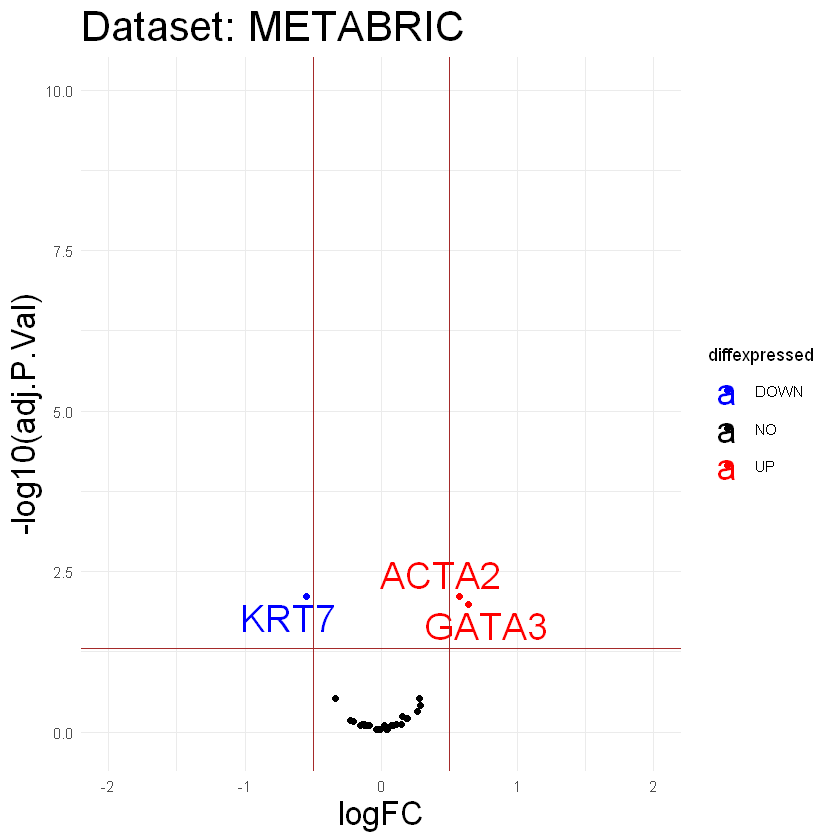

In [1336]:
limma_result_fit$diffexpressed <- "NO"
# if log2Foldchange > 0.5 and pvalue < 0.05, set as "UP" 
limma_result_fit$diffexpressed[limma_result_fit$logFC > 0.5 & limma_result_fit$adj.P.Val < 0.05] <- "UP"
# if log2Foldchange < -0.5 and pvalue < 0.05, set as "DOWN"
limma_result_fit$diffexpressed[limma_result_fit$logFC < -0.5 & limma_result_fit$adj.P.Val < 0.05] <- "DOWN"

p <- ggplot(data=limma_result_fit, aes(x=logFC, y=-log10(P.Value), label=row.names(data_subset_3),col=diffexpressed)) + geom_point(size = 2, alpha = 0.8) + theme_minimal() + geom_text_repel()
p2 <- p + geom_vline(xintercept=c(-0.6, 0.6), col="red") + geom_hline(yintercept=-log10(0.05), col="red")
p3 <- p2 + scale_color_manual(values=c("blue", "black", "red"))
mycolors <- c("blue", "red", "black")
names(mycolors) <- c("DOWN", "UP", "NO")
p3 <- p2 + scale_colour_manual(values = mycolors)

limma_result_fit$delabel <- NA
limma_result_fit$delabel[limma_result_fit$diffexpressed != "NO"] <- limma_result_fit$gene_symbol[limma_result_fit$diffexpressed != "NO"]

ggplot(data=limma_result_fit, aes(x=logFC, y=-log10(adj.P.Val), label=delabel,col=diffexpressed)) +
        geom_point() + 
        theme_minimal() +
        geom_text_repel(size=8,max.overlaps = 10) +
        scale_color_manual(values=c("blue", "black", "red")) +
        geom_vline(xintercept=c(-0.5, 0.5), col="brown") +
        geom_hline(yintercept=-log10(0.05), col="brown") + xlim(-2, 2) +ylim(-0.1,10) + ggtitle("Dataset: METABRIC") +theme(axis.title = element_text(size = 20))  + theme(plot.title = element_text(size = 25))

In [1265]:
row.names(limma_result_fit)

[1] "KRT7"   "GATA3"  "ACTA2"  "H3F3B"  "EGFR"   "MS4A1"  "CD68"   "TP53"  
 [9] "VWF"    "FN1"    "KRT19"  "KRT8"   "CDH1"   "RPS6"   "ERBB2"  "PTPRC" 
[17] "CA9"    "KRT5"   "MTOR"   "MYC"    "CD44"   "MKI67"  "ESR1"   "VIM"   
[25] "SNAI2"  "CASP3"  "CD3E"   "KRT14"  "PGR"    "TWIST1"

In [1170]:
vennCounts(results)

  match-notmatch Counts
1              0     29
2              1      1
attr(,"class")
[1] "VennCounts"

In [688]:
pats = c(173,22,221,164,246,15,104,109,250,183,88,50,87,150,231,9,153,182,175,101,57,107,161,62,116,160,165,214
        ,4,103,98,155,74,80,111,123,239,73,255,3,100,62,108,83,209,149,197,77,156,118,114,76,140,143,136,84,129,
        125,26,31,144,145,99,105,33,92,63,217,132,82,47,188,27,58,25,42,34,68,258,247,21,190,248,20,70,121,97,241,
        152,81,119,169,72,65,43,131,18,11,137,201,195,46,202,207,225,45,177,10,243,192,95,196,17,163,36,170,48,240,
        215,35,171,205,85,224,5,52,128,53,67,251,253,218,115,130,79,206,181,162,208,211,176,142,71,141,186,259,204,
        230,157,66,13,44,37,212,12,59,54,193,126,29,112,237,242,154,233,254,38,200,14,235,234,256,198,139,147,86,151,
        226,135,185,110,199,184,1,227,213,39,60,56,232,245,138,16,238,91,117,174,40,2,41,93,106,223,19,229,90,167,24,6,
        134,158,252,203,222,30,89,69,127,124,159,75,220,219,191,180,120,172,102,168,7,96,113,189,257,166,216,178,32,49,148,
        249,133,28,236,194,51,179,78,187,8,122,146,55,244,23,210,64,94,228)

In [689]:
c(173,22,221,164,246,15,104,109,250,183,88,50,87,150,231,9,153,182,175,101,57,107,161,62,116,160,165,214
        ,4,103,98,155,74,80,111,123,239,73,255,3,100,62,108,83,209,149,197,77,156,118,114,76,140,143,136,84,
        125,26,31,144,145,99,105,33,92,63,217,132,82,47,188,27,58,25,42,34,68,258,247,21,190,248,20,70,121,97,241,
        152,81,119,169,72,65,43,131,18,11,137,201,195,46,202,207,225,45,177,10,243,192,95,196,17,163,36,170,48,240,
        215,35,171,205,85,224,5,52,128,53,67,251,253,218,115,130,79,206,181,162,208,211,176,142,71,141,186,259,204,
        230,157,66,13,44,37,212,12,59,54,193,126,29,112,237,242,154,233,254,38,200,14,235,234,256,198,139,147,86,151,
        226,135,185,110,199,184,1,227,213,39,60,56,232,245,138,16,238,117,174,40,2,41,93,106,223,19,229,90,167,24,6,
        134,158,252,203,222,30,89,69,127,124,159,75,220,219,191,180,120,172,102,168,7,96,113,189,257,166,216,178,32,49,148,
        249,133,28,236,194,51,179,78,8,122,146,55,244,23,210,64,94,228)

[1] 173  22 221 164 246  15 104 109 250 183  88  50  87 150 231   9 153 182
 [19] 175 101  57 107 161  62 116 160 165 214   4 103  98 155  74  80 111 123
 [37] 239  73 255   3 100  62 108  83 209 149 197  77 156 118 114  76 140 143
 [55] 136  84 125  26  31 144 145  99 105  33  92  63 217 132  82  47 188  27
 [73]  58  25  42  34  68 258 247  21 190 248  20  70 121  97 241 152  81 119
 [91] 169  72  65  43 131  18  11 137 201 195  46 202 207 225  45 177  10 243
[109] 192  95 196  17 163  36 170  48 240 215  35 171 205  85 224   5  52 128
[127]  53  67 251 253 218 115 130  79 206 181 162 208 211 176 142  71 141 186
[145] 259 204 230 157  66  13  44  37 212  12  59  54 193 126  29 112 237 242
[163] 154 233 254  38 200  14 235 234 256 198 139 147  86 151 226 135 185 110
[181] 199 184   1 227 213  39  60  56 232 245 138  16 238 117 174  40   2  41
[199]  93 106 223  19 229  90 167  24   6 134 158 252 203 222  30  89  69 127
[217] 124 159  75 220 219 191 180 120 172 102 168   7  96 113 189 257 166 216
[235] 178  32  49 148 249 133  28 236 194  51 179  78   8 122 146  55 244  23
[253] 210  64  94 228